<a href="https://colab.research.google.com/github/edhillon7/Neural-Networks/blob/main/exp4_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned Parameters (theta): [5.1642718  2.69207147]


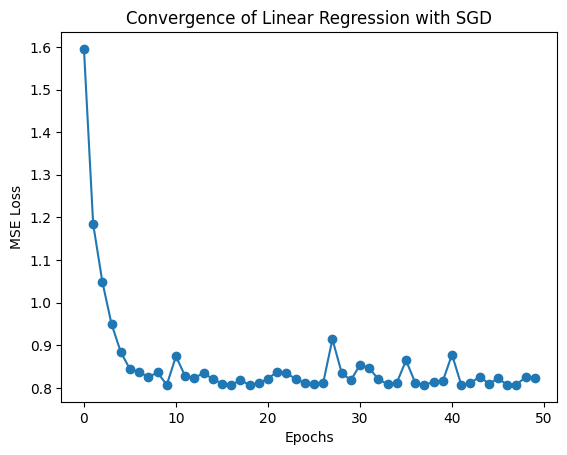

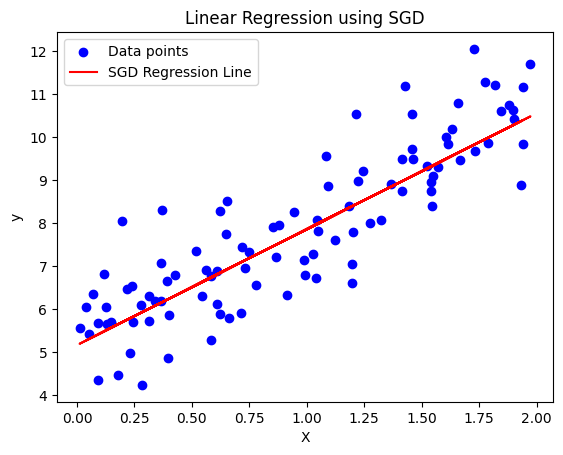

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Generate synthetic dataset
# ----------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)

# Add bias term (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]


# ----------------------------
# Mean Squared Error
# ----------------------------
def mse(X, y, theta):
    return np.mean((X.dot(theta) - y) ** 2)


# ----------------------------
# Stochastic Gradient Descent
# ----------------------------
def stochastic_gradient_descent(X, y, lr=0.01, n_epochs=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # random initialization
    loss_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            # Pick a random training sample
            rand_i = np.random.randint(m)
            xi = X[rand_i:rand_i+1]
            yi = y[rand_i:rand_i+1]

            # Compute gradient
            gradient = 2 * xi.T.dot(xi.dot(theta) - yi)

            # Update parameters
            theta -= lr * gradient

        # Track loss at the end of each epoch
        loss_history.append(mse(X, y, theta))

    return theta, loss_history


# ----------------------------
# Train the model
# ----------------------------
theta_sgd, loss_history = stochastic_gradient_descent(X_b, y, lr=0.01, n_epochs=50)

print("Learned Parameters (theta):", theta_sgd.ravel())

# ----------------------------
# Plot convergence
# ----------------------------
plt.plot(loss_history, marker="o")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Convergence of Linear Regression with SGD")
plt.show()

# ----------------------------
# Plot regression line
# ----------------------------
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, X_b.dot(theta_sgd), color="red", label="SGD Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression using SGD")
plt.show()
